In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import brier_score_loss
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import math
import os
from sklearn import model_selection
import pickle
from tkinter import messagebox
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
x = files.upload()

Saving data01.csv to data01.csv


In [3]:
dataset = pd.read_csv("data01.csv")
print(dataset.head())

   group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.1625

In [4]:
print(dataset.isnull().sum())

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [5]:
dataset["BMI"].fillna(dataset["BMI"].mean(), inplace=True)
dataset["heart rate"].fillna(dataset["heart rate"].mean(), inplace=True)
dataset["Systolic blood pressure"].fillna(dataset["Systolic blood pressure"].mean(), inplace=True)
dataset["Diastolic blood pressure"].fillna(dataset["Diastolic blood pressure"].mean(), inplace=True)
dataset["Respiratory rate"].fillna(dataset["Respiratory rate"].mean(), inplace=True)
dataset["temperature"].fillna(dataset["temperature"].mean(), inplace=True)
dataset["SP O2"].fillna(dataset["SP O2"].mean(), inplace=True)
dataset["Urine output"].fillna(dataset["Urine output"].mode()[0], inplace=True)
dataset["Neutrophils"].fillna(dataset["Neutrophils"].mean(), inplace=True)
dataset["Basophils"].fillna(dataset["Basophils"].mean(), inplace=True)
dataset["Lymphocyte"].fillna(dataset["Lymphocyte"].mean(), inplace=True)
dataset["PT"].fillna(dataset["PT"].mean(), inplace=True)
dataset["Creatine kinase"].fillna(dataset["Creatine kinase"].mean(), inplace=True)
dataset["glucose"].fillna(dataset["glucose"].mean(), inplace=True)
dataset["PH"].fillna(dataset["PH"].mean(), inplace=True)
dataset["Lactic acid"].fillna(dataset["Lactic acid"].mean(), inplace=True)
dataset["PCO2"].fillna(dataset["PCO2"].mean(), inplace=True)

In [6]:
print(dataset.isnull().sum())

group                        0
ID                           0
outcome                      1
age                          0
gendera                      0
BMI                          0
hypertensive                 0
atrialfibrillation           0
CHD with no MI               0
diabetes                     0
deficiencyanemias            0
depression                   0
Hyperlipemia                 0
Renal failure                0
COPD                         0
heart rate                   0
Systolic blood pressure      0
Diastolic blood pressure     0
Respiratory rate             0
temperature                  0
SP O2                        0
Urine output                 0
hematocrit                   0
RBC                          0
MCH                          0
MCHC                         0
MCV                          0
RDW                          0
Leucocyte                    0
Platelets                    0
Neutrophils                  0
Basophils                    0
Lymphocy

In [7]:
dataset = dataset.dropna(how="any")

In [8]:
        dataset.describe().T.style.background_gradient(cmap = 'YlOrBr')

,count,mean,std,min,25%,50%,75%,max
group,1155.000000,1.296970,0.457121,1.000000,1.000000,1.000000,2.000000,2.000000
ID,1155.000000,150621.252814,29100.122207,100213.000000,125419.500000,151797.000000,176011.500000,199952.000000
outcome,1155.000000,0.136797,0.343781,0.000000,0.000000,0.000000,0.000000,1.000000
age,1155.000000,74.100433,13.349727,19.000000,65.000000,77.000000,85.000000,99.000000
gendera,1155.000000,1.526407,0.499518,1.000000,1.000000,2.000000,2.000000,2.000000
BMI,1155.000000,30.202474,8.483261,13.346801,25.265587,30.188278,32.119633,104.970366
hypertensive,1155.000000,0.719481,0.449448,0.000000,0.000000,1.000000,1.000000,1.000000
atrialfibrillation,1155.000000,0.455411,0.498224,0.000000,0.000000,0.000000,1.000000,1.000000
CHD with no MI,1155.000000,0.085714,0.280063,0.000000,0.000000,0.000000,0.000000,1.000000
diabetes,1155.000000,0.421645,0.494036,0.000000,0.000000,0.000000,1.000000,1.000000


In [9]:
dataset.shape

(1155, 51)

In [10]:
dataset.drop(["group", "ID"], axis=1, inplace=True)

array([[<Axes: title={'center': 'outcome'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gendera'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'hypertensive'}>,
        <Axes: title={'center': 'atrialfibrillation'}>,
        <Axes: title={'center': 'CHD with no MI'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'deficiencyanemias'}>,
        <Axes: title={'center': 'depression'}>,
        <Axes: title={'center': 'Hyperlipemia'}>,
        <Axes: title={'center': 'Renal failure'}>,
        <Axes: title={'center': 'COPD'}>,
        <Axes: title={'center': 'heart rate'}>],
       [<Axes: title={'center': 'Systolic blood pressure'}>,
        <Axes: title={'center': 'Diastolic blood pressure'}>,
        <Axes: title={'center': 'Respiratory rate'}>,
        <Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'SP O2'}>,
        <Axes: title={'center': 'Urine output'}>,
        <

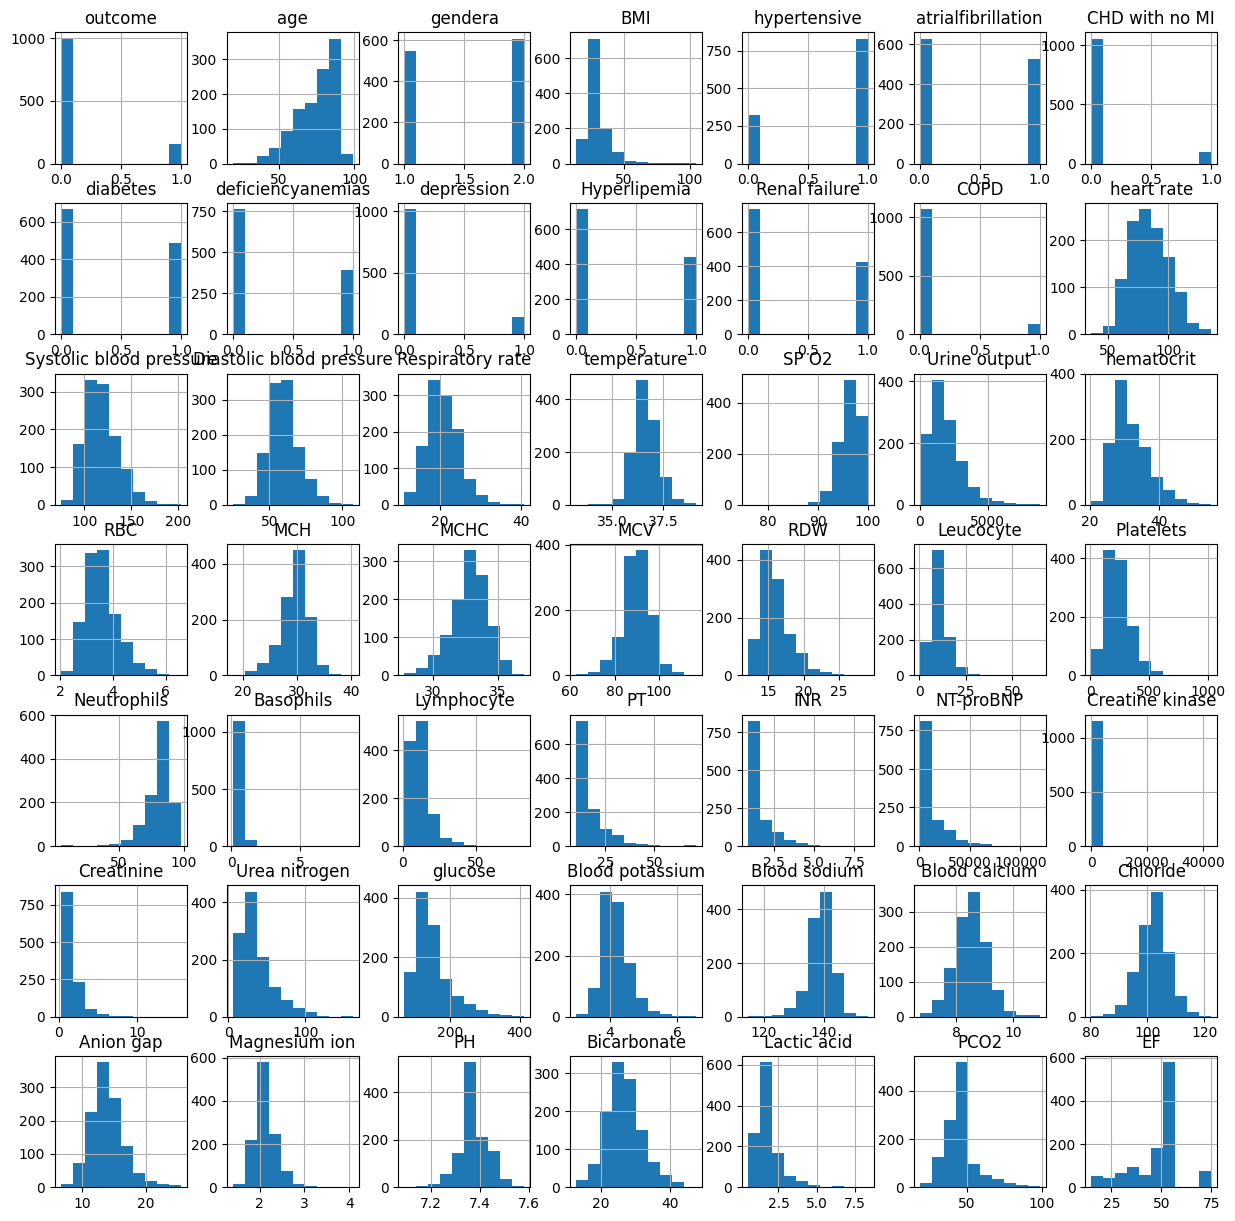

In [11]:
dataset.hist(figsize=(15, 15))

In [12]:
X = dataset.drop("outcome", axis=1)
y = dataset["outcome"]

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.8917748917748918

In [16]:
    cm = confusion_matrix(y_test, y_pred)

<Axes: >

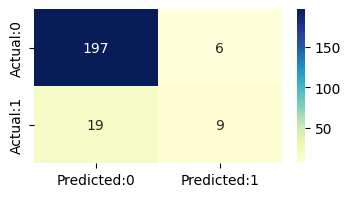

In [17]:
        conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
        plt.figure(figsize=(4, 2))
        sn.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

203
28
216
15


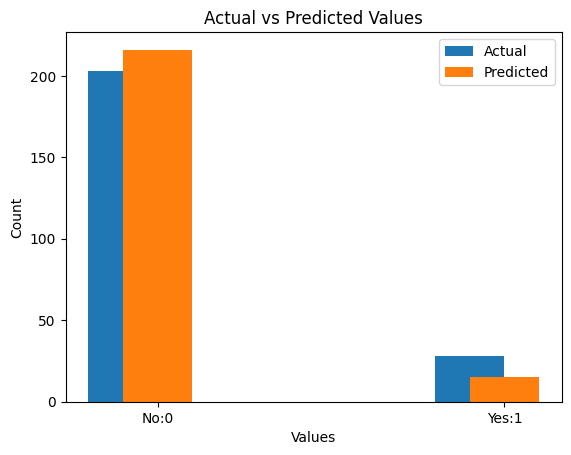

In [18]:
actual = y_test
predicted = y_pred

# Count the number of 0's and 1's in actual and predicted lists
actual_zeros = np.count_nonzero(actual == 0)
print(actual_zeros)
actual_ones = np.count_nonzero(actual == 1)
print(actual_ones)
predicted_zeros = np.count_nonzero(predicted == 0)
print(predicted_zeros)
predicted_ones = np.count_nonzero(predicted == 1)
print(predicted_ones)

# Set the width of each bar
bar_width = 0.20
bar_positions = [0, 1]

# Plot the actual and predicted bars
fig, ax = plt.subplots()
actual_bars = ax.bar(bar_positions, [actual_zeros, actual_ones], bar_width, label='Actual')
predicted_bars = ax.bar(np.array(bar_positions) + bar_width/2, [predicted_zeros, predicted_ones], bar_width, label='Predicted')

# Set the labels and title of the plot
ax.set_xlabel('Values')
ax.set_ylabel('Count')
ax.set_title('Actual vs Predicted Values')
ax.set_xticks(np.array(bar_positions) + bar_width / 2)
ax.set_xticklabels(('No:0', 'Yes:1'))
ax.legend()

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


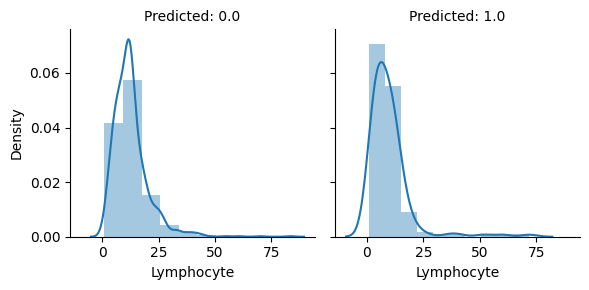

In [19]:
plot = sn.FacetGrid(dataset, col='outcome')
plot.map(sn.distplot, 'Lymphocyte', bins=10)
# Set the plot titles
plot.set_titles(col_template='Predicted: {col_name}')
# Show the plot
plt.show()

In [20]:
        tn = cm[0, 0]
        fp = cm[0, 1]
        fn = cm[1, 0]
        tp = cm[1, 1]

        precision = tp / (tp + fp)
        print('Precision', precision)
        recall = tp / (tp + fn)
        print('recall', recall)
        fmeasure = (2 * precision * recall) / (precision + recall)

Precision 0.6
recall 0.32142857142857145


In [21]:
        Correct=cm[0,0]+cm[1,1]
        print('Correct', Correct)
        Incorrect=cm[0,1]+cm[1,0]
        print('InCorrect', Incorrect)

Correct 206
InCorrect 25


In [22]:
        accuracy = logreg.score(X_test,y_test)
        print('accuracy', accuracy)

accuracy 0.8917748917748918
